In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from category_encoders import TargetEncoder, OneHotEncoder, CountEncoder, SumEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error as mse
import warnings
warnings.filterwarnings('ignore')

## Wczytanie ramki danych

In [2]:
allegro_transactions = pd.read_csv("allegro.csv")
allegro_transactions.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


## Ujednolicenie zmiennnych

Jak możemy zauważyć w obserwacji numer 4 it_location to "BIAŁYSTOK", natomiast inne pisane są w sposób naturalny, więc aby ujednolić zmienię wszystkie litery w nazwach miejscowości na małe.

In [3]:
allegro_transactions["it_location"]=allegro_transactions["it_location"].str.lower()
allegro_transactions.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,wola krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,białystok,"Odzież, Obuwie, Dodatki"


## Target Encoding

In [4]:
target_encoder=TargetEncoder()
allegro_target=allegro_transactions.copy()
allegro_target['it_location']=target_encoder.fit_transform(allegro_target['it_location'], allegro_target['price'])
allegro_target.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,84.132898,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,84.132898,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,64.883187,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,35.433365,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,73.772916,"Odzież, Obuwie, Dodatki"


Target Encoding polega na zsumowaniu wartości z price gdy it_location jest takie same, następnie wynik dzielony jest przez liczbę wystąpień i otrzymana liczba zamieniania z odpowiednim miastem w it_location. Jest to rozwiązanie, które nie tworzy nowych kolumn, jednak wprowadza sztuczną relacje pomiędzy miastami. Dodatkowo średnia jest bardzo podatna na wartości odstające.

One-hot Encodning polega na stworzeniu nowych kolumn odpowiadających unikalnym wartościom z targetowanej kolumny. Jeśli w danym rekordzie występowała wartość z danej kolumny wpisywana jest w tym miejscu 1, w innym przypadku wpisywane jest 0. Wielką wada tego rozwiązania jest tworzenie nowych kolumn, których ilość zależna jest od unikalnych wartośći w targetowanej kolumnie. Jeśli ramka posiada bardzo dużo unikalnych zmiennych może to zniszczyć strukture ramki oraz wykonanej odpowiedniej funkcji może trwac bardzo długo.


## One-hot Encoding

In [5]:
hot_encoder=OneHotEncoder(cols=["main_category"])
allegro_hot=allegro_transactions.copy()
hot_encoder.fit(allegro_hot.drop("price", axis=1),allegro_hot["price"])
x=hot_encoder.transform(allegro_hot.drop("price", axis=1))
x.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,it_is_brand_zone,...,main_category_18,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23,main_category_24,main_category_25,main_category_26,main_category_27
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,1,997,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,1,9288,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,1,895,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,0,971,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,1,950,0,...,0,0,0,0,0,0,0,0,0,0


## Count Encoding

In [6]:
count_encoder=CountEncoder(cols=["main_category"])
allegro_count=allegro_transactions.copy()
count_encoder.fit(allegro_count.drop("price", axis=1),allegro_count["price"])
x=count_encoder.transform(allegro_count.drop("price", axis=1))
x.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,1,997,0,50177,warszawa,14491
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,1,9288,0,12428,warszawa,54257
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,1,895,0,7389,leszno,91042
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,0,971,0,15006,wola krzysztoporska,11572
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,1,950,0,32975,białystok,54257


Count Encoding polega na zamienieniu danej wartości w targetowanej kolumnie na ilość jej wystąpień. Podobnie jak w Target Encodingu wproawdza to sztuczna relacje porządku pomiedzy zmiennymi.


## Sum Encoding


In [7]:
sum_encoder=SumEncoder(cols=["main_category"])
allegro_sum=allegro_transactions.copy()
sum_encoder.fit(allegro_sum.drop("price", axis=1),allegro_sum["price"])
x=sum_encoder.transform(allegro_sum.drop("price", axis=1))
x.head()

,intercept,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,...,main_category_16,main_category_17,main_category_18,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23,main_category_24,main_category_25
0,1,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,1,997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,1,9288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,1,895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,0,971,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,1,950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Sum Encoding jest bardzo podobne do One-hot Encodingu. Rożnica polega na tym, że dla któregoś rekordu we wszystkich nowo utowrzonych kolumnach jest -1.

## Uzupełnienie braków

Ze względu na duża ilość rekordów w ramce danych postanowiłem wybrać z niej 6% danych i na nich wykonać drugi podpunkt pracy domowej.


In [14]:
allegro_braki=allegro_transactions.sample(frac=0.06).reset_index()[["price","it_seller_rating","it_quantity"]]
allegro_braki2=allegro_braki.copy()
braki=allegro_braki.sample(frac=0.1)
braki.reset_index()
allegro_braki2.loc[list(braki.index),"it_seller_rating"]=np.nan
allegro_braki2.head()

,price,it_seller_rating,it_quantity
0,15.99,4185.0,9983
1,85.00,4758.0,982
2,58.00,966.0,10
3,99.00,1882.0,99948
4,19.50,94.0,90


In [15]:
allegro_braki2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25201 entries, 0 to 25200
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             25201 non-null  float64
 1   it_seller_rating  22681 non-null  float64
 2   it_quantity       25201 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 590.8 KB


Po usunięciu 5% wartości z *it_seller_rating*  uzupełniłem je korzystając z metody Nearest neighbors.

In [9]:
knn_imputer = KNNImputer(weights="uniform",n_neighbors=5)
allegro_braki2 = knn_imputer.fit_transform(allegro_braki2)
allegro_braki2 = pd.DataFrame(allegro_braki2, columns = ["price", "it_seller_rating", "it_quantity"])

np.sqrt(mse(allegro_braki.it_seller_rating, allegro_braki2.it_seller_rating))

11840.312159595373

Rmse jest bardzo duży, z tego wynika, że ta metoda nie spisała się najlepiej. Sprawdzmy jakie będą wyniki gdy uzupełnimy dane 10 razy.

## Eksperyment 1

In [10]:
lista=[0 for i in range(10)]


for i in range(10):
    allegro_braki2=allegro_braki.copy()
    braki=allegro_braki2.sample(frac=0.1)
    braki.reset_index()
    allegro_braki2.loc[list(braki.index),"it_seller_rating"]=np.nan
    knn_imputer = KNNImputer(weights="uniform",n_neighbors=5)
    allegro_braki2 = knn_imputer.fit_transform(allegro_braki2)
    allegro_braki2 = pd.DataFrame(allegro_braki2, columns = ["price", "it_seller_rating", "it_quantity"])
    msee = mse(allegro_braki2["it_seller_rating"], allegro_braki["it_seller_rating"])
    lista[i] = np.sqrt(msee)
    


print(f"Średnia: {(np.mean(lista))}")
print(f"Odchylenie standardowe: {(np.std(lista))})")

Średnia: 12120.324648840098
Odchylenie standardowe: 510.33728398729295)


## Eksperyment 2

In [11]:

lista1=[0 for i in range(10)]
lista2=[0 for i in range(10)]

for i in range(10):
    allegro_braki2=allegro_braki.copy()
    braki=allegro_braki2.sample(frac=0.1)
    braki.reset_index()
    allegro_braki2.loc[list(braki.index),"it_seller_rating"]=np.nan
    braki=allegro_braki2.sample(frac=0.1)
    braki.reset_index()
    allegro_braki2.loc[list(braki.index),"it_quantity"]=np.nan
    knn_imputer = KNNImputer(weights="uniform",n_neighbors=5)
    allegro_braki2 = knn_imputer.fit_transform(allegro_braki2)
    allegro_braki2 = pd.DataFrame(allegro_braki2, columns = ["price", "it_seller_rating", "it_quantity"])
    msee = mse(allegro_braki2["it_seller_rating"], allegro_braki["it_seller_rating"])
    lista1[i] = np.sqrt(msee)
    msee = mse(allegro_braki2["it_quantity"], allegro_braki["it_quantity"])
    lista2[i] = np.sqrt(msee)
    


print(f"Średnia dla it_seller_rating : {(np.mean(lista1))}")
print(f"Odchylenie standardowe dla it_seller_rating: {(np.std(lista1))})")

print(f"Średnia dla it_quantity : {(np.mean(lista2))}")
print(f"Odchylenie standardowe dla it_quantity: {(np.std(lista2))})")

Średnia dla it_seller_rating : 12415.758799906203
Odchylenie standardowe dla it_seller_rating: 365.2019611591098)
Średnia dla it_quantity : 7928.4169505019545
Odchylenie standardowe dla it_quantity: 214.27113226483016)


## Wykres przedstawiający różnice w rmse dla *it_seller_rating* pomiędzy eksperymentami

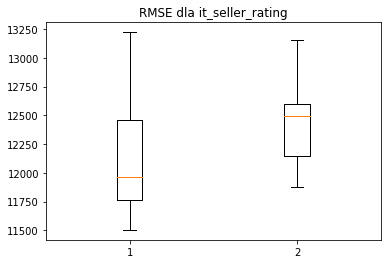

In [12]:
fig, ax = plt.subplots()
plt.title("RMSE dla it_seller_rating")
ax.set_xticklabels(["1", "2"])
ax.boxplot([lista, lista1])
plt.show()

Z wykresu wynika, że błąd przy uzupełnianiu brakujących danych *it_seller_rating* jest w większy gdy w ramce brakuje również niektórych informacji na temat *it_quantity*.

## Wykres przedstawiający boxploty dla błedów *it_seller_rating* oraz *it_quantity*

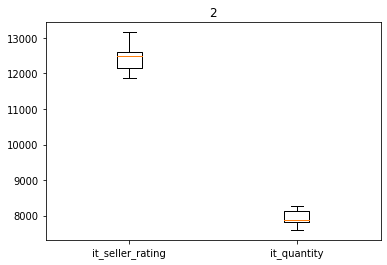

In [13]:
fig, ax = plt.subplots()
plt.title("2")
ax.set_xticklabels(["it_seller_rating", "it_quantity"])
ax.boxplot([lista1, lista2])
plt.show()

Z wykresu wynika, iż błąd przy uzupełnianiu brakujących informacji w kolumnie *it_quantity* jest sporo mniejszy niż podczas uzupełniania w kolumnie *it_seller_rating*.